## Lesson 1: Accessing Spatial Data Files
- There are several ways we typically get spatial data into R:
  + Load spatial files we have on our machine or from remote source
  + Load spatial data that is part of an R package
  + Grab data using API (often making use of particular R packages)
  + Converting flat files with x,y data to spatial data
  + Geocoding data

### Vector Data

The main library I like to use for for reading vector data in Python is `geopandas`. Note that any arguments passed to `geopandas.read_file()` after the file name will be passed directly to `fiona.open()`

We can get a list of supported file formats for vector data using `fiona.supported_drivers`

In [1]:
import fiona
fiona.supported_drivers
# help(fiona.open) #for more details and parameters

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

#### Read in shapefiles with geopandas
Note that geopandas can read a zipped shapefile - no need to download and unzip! An advantage over `st_read` in R with `sf`

<AxesSubplot:>

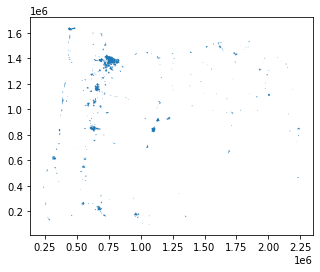

In [2]:
import geopandas as gpd
cities = gpd.read_file("ftp://ftp.gis.oregon.gov/adminbound/citylim_2017.zip")
cities.plot()

#### Read in data from ESRI geodatabase with geopandas
First we'll list the layers in the geodatabase.  We can use `fiona.listlayers` to do this.

In [6]:
import fiona
fiona.listlayers('GitProjects/AWRA2022GeoWorkshop/Workbooks/R/Session2/OregonStateParks_20181010.gdb')

['LO_PARKS']

Here we emulate how we read ESRI file geodabase files in R with `sf`.  Note that 

<AxesSubplot:>

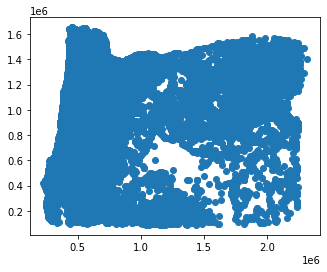

In [7]:
ofp = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/ofpbds2020.gdb', 
                    driver='FileGDB', layer='ofpbds_pt')
ofp.plot()

Rather than specify by name we could specify our layer by position:

<AxesSubplot:>

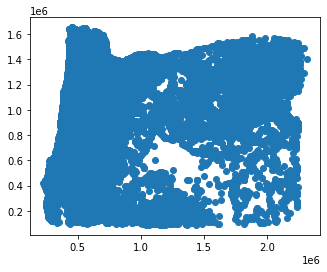

In [8]:
ofp = gpd.read_file('GitProjects/AWRA2022GeoWorkshop/ofpbds2020.gdb', 
                    driver='FileGDB', layer=1)
ofp.plot()